In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

C:\Users\khuza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.25.2 and <2.6.0 is required for this version of SciPy (detected version 1.24.3)
  from scipy.stats import gaussian_kde


In [2]:
file_path = r"C:\Users\khuza\OneDrive\Desktop\Data science course\PROJECTS\UFC Fighter Performance Analytics Dashboard\data\ufc_fights.csv" 
outdir = r"C:\Users\khuza\OneDrive\Desktop\Data science course\PROJECTS\UFC Fighter Performance Analytics Dashboard\reports\figures"
os.makedirs(outdir, exist_ok=True)

print("Loading dataset...")
df = pd.read_csv(file_path)
print("✅ Data loaded. Shape:", df.shape)

Loading dataset...
✅ Data loaded. Shape: (268, 15)


In [4]:
print("\n🔎 Dataset Info:")
df.info()


🔎 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   date                      268 non-null    object 
 1   winner                    268 non-null    object 
 2   loser                     268 non-null    object 
 3   weight_class              268 non-null    object 
 4   method                    268 non-null    object 
 5   round                     268 non-null    int64  
 6   time_minutes              268 non-null    float64
 7   winner_strikes_landed     268 non-null    int64  
 8   winner_strikes_attempted  268 non-null    int64  
 9   loser_strikes_landed      268 non-null    int64  
 10  loser_strikes_attempted   268 non-null    int64  
 11  winner_takedowns          268 non-null    int64  
 12  winner_takedown_attempts  268 non-null    int64  
 13  loser_takedowns           268 non-null    int64 

In [5]:
print("\n📊 First 5 Rows:")
df.head()


📊 First 5 Rows:


,date,winner,loser,weight_class,method,round,time_minutes,winner_strikes_landed,winner_strikes_attempted,loser_strikes_landed,loser_strikes_attempted,winner_takedowns,winner_takedown_attempts,loser_takedowns,loser_takedown_attempts
0,09-03-2024,Jon Jones,Stipe Miocic,Heavyweight,TKO,3,2.14,78,134,45,89,1,2,0,1
1,17-02-2024,Alexander Volkanovski,Islam Makhachev,Lightweight,Decision,5,25.00,145,267,134,234,2,5,3,8
2,20-01-2024,Conor McGregor,Michael Chandler,Lightweight,KO/TKO,2,3.45,67,98,23,45,0,1,1,3
3,16-12-2023,Leon Edwards,Colby Covington,Welterweight,Decision,5,25.00,178,312,156,278,1,3,2,6
4,11-11-2023,Sean Strickland,Israel Adesanya,Middleweight,Decision,5,25.00,189,334,134,223,0,2,1,4


In [6]:
numeric_summary = df.describe().T
numeric_summary.to_csv(os.path.join(outdir, "numeric_summary.csv"))
print("✅ Numeric summary saved.")

✅ Numeric summary saved.


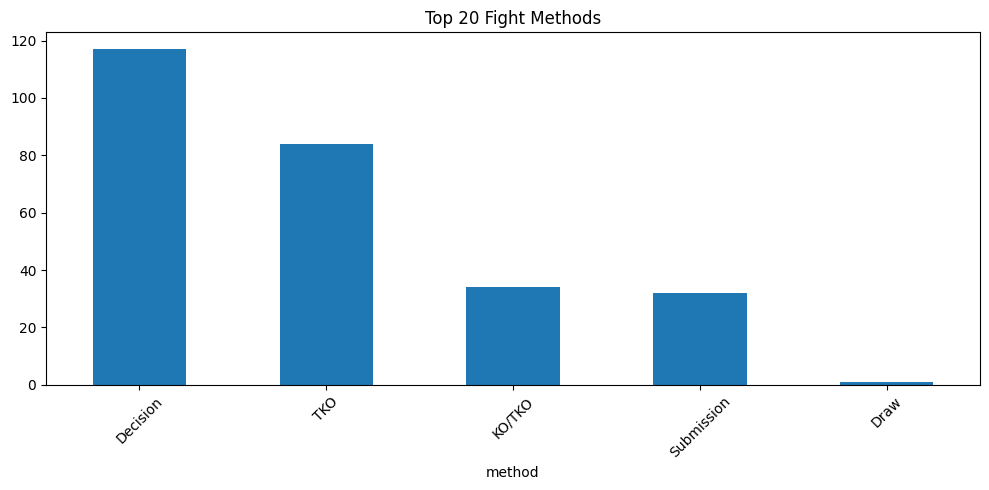

In [7]:
if "method" in df.columns:
    plt.figure(figsize=(10,5))
    df["method"].value_counts().head(20).plot(kind='bar')
    plt.title("Top 20 Fight Methods")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(outdir, "methods_top20_bar.png"))
    plt.show()

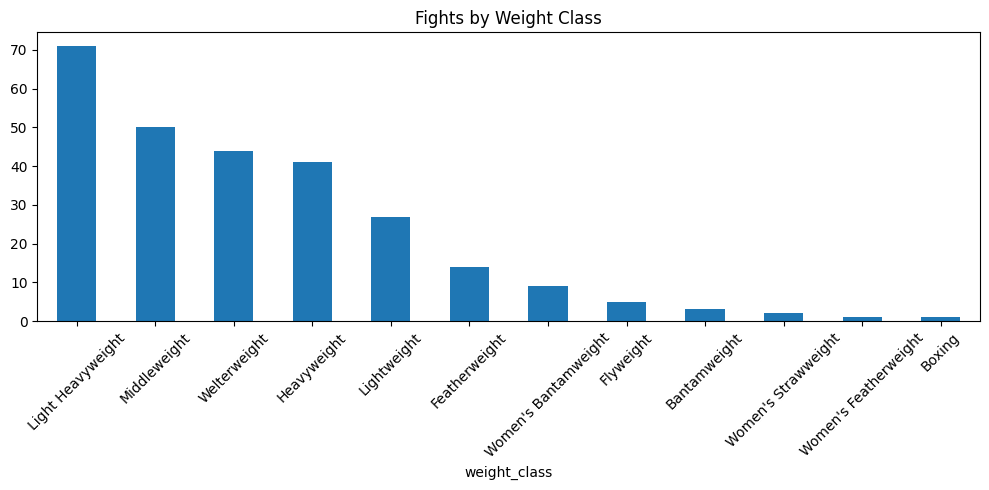

In [8]:
if "weight_class" in df.columns:
    plt.figure(figsize=(10,5))
    df["weight_class"].value_counts().plot(kind='bar')
    plt.title("Fights by Weight Class")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(outdir, "weight_class_bar.png"))
    plt.show()

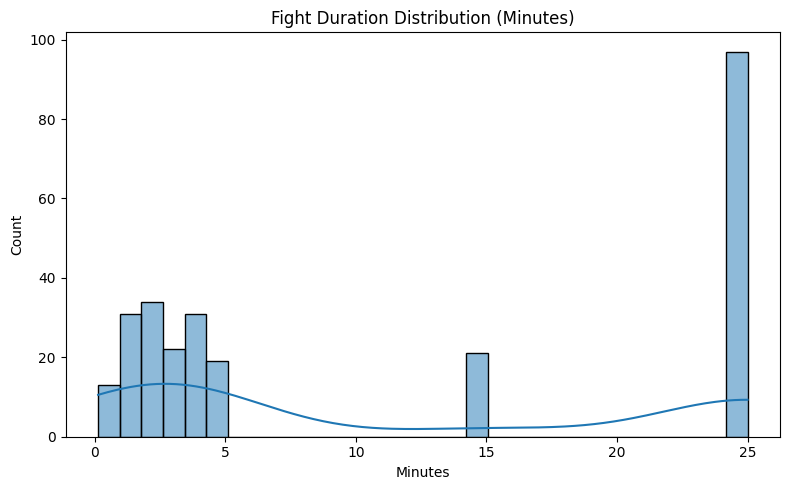

In [9]:
if "time_minutes" in df.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df["time_minutes"].dropna(), bins=30, kde=True)
    plt.title("Fight Duration Distribution (Minutes)")
    plt.xlabel("Minutes")
    plt.tight_layout()
    plt.savefig(os.path.join(outdir, "time_minutes_hist.png"))
    plt.show()


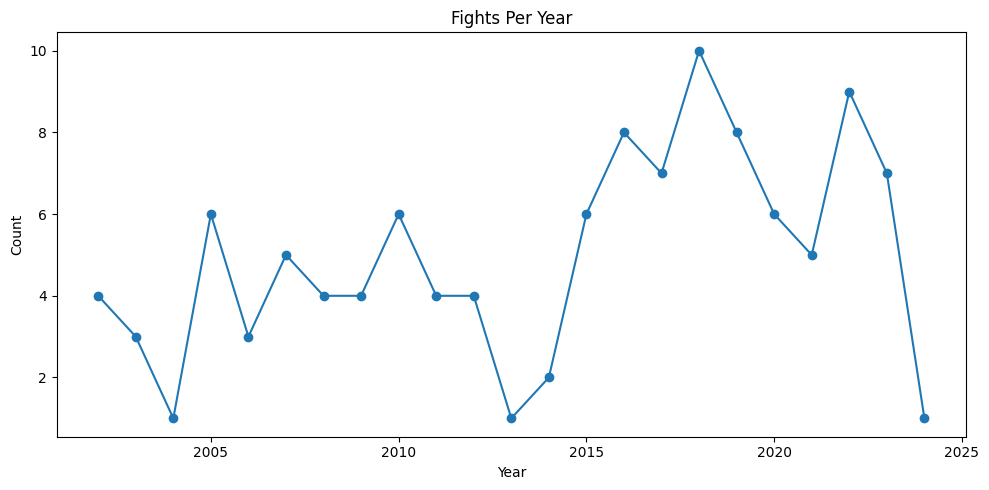

In [10]:
if "date" in df.columns:
    df["year"] = pd.to_datetime(df["date"], errors='coerce').dt.year
    fights_per_year = df["year"].value_counts().sort_index()
    plt.figure(figsize=(10,5))
    fights_per_year.plot(kind='line', marker='o')
    plt.title("Fights Per Year")
    plt.xlabel("Year")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.savefig(os.path.join(outdir, "fights_per_year_line.png"))
    plt.show()

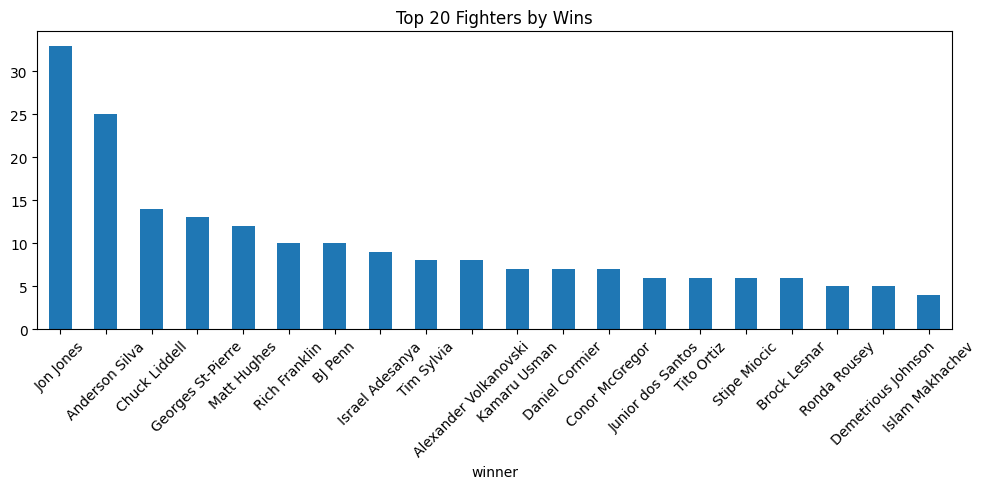

In [11]:
if "winner" in df.columns:
    top20_wins = df["winner"].value_counts().head(20)
    plt.figure(figsize=(10,5))
    top20_wins.plot(kind='bar')
    plt.title("Top 20 Fighters by Wins")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(outdir, "top20_wins_bar.png"))
    plt.show()

In [12]:
if "fighter" in df.columns:
    top20_fights = df["fighter"].value_counts().head(20)
    plt.figure(figsize=(10,5))
    top20_fights.plot(kind='bar')
    plt.title("Top 20 Fighters by Total Fights")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(outdir, "top20_fights_bar.png"))
    plt.show()

In [13]:
if {"weight_class","strike_accuracy"}.issubset(df.columns):
    acc_wc = df.groupby("weight_class")["strike_accuracy"].mean().reset_index()
    acc_wc.to_csv(os.path.join(outdir, "accuracy_by_weight_class.csv"), index=False)
    plt.figure(figsize=(10,5))
    sns.barplot(data=acc_wc, x="weight_class", y="strike_accuracy")
    plt.title("Average Strike Accuracy by Weight Class")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(outdir, "strike_acc_by_wc_bar.png"))
    plt.show()

In [14]:
if {"weight_class","takedown_accuracy"}.issubset(df.columns):
    acc_wc2 = df.groupby("weight_class")["takedown_accuracy"].mean().reset_index()
    plt.figure(figsize=(10,5))
    sns.barplot(data=acc_wc2, x="weight_class", y="takedown_accuracy")
    plt.title("Average Takedown Accuracy by Weight Class")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(outdir, "takedown_acc_by_wc_bar.png"))
    plt.show()

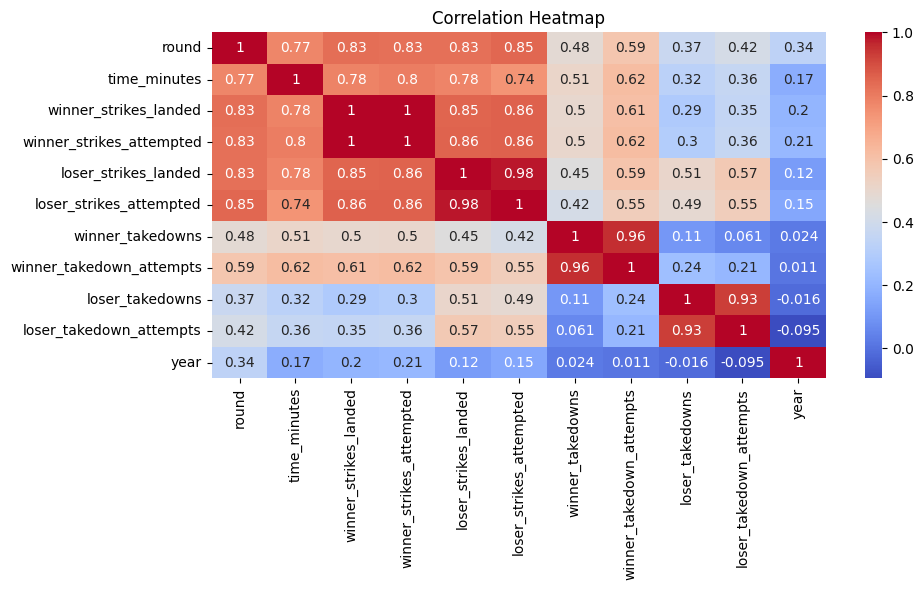

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig(os.path.join(outdir, "corr_heatmap.png"))
plt.show()

In [19]:
if {"strike_accuracy","time_minutes"}.issubset(df.columns):
    plt.figure(figsize=(8,5))
    sns.scatterplot(data=df, x="time_minutes", y="strike_accuracy", alpha=0.6)
    plt.title("Strike Accuracy vs Fight Duration")
    plt.tight_layout()
    plt.savefig(os.path.join(outdir, "scatter_acc_vs_time.png"))
    plt.show()

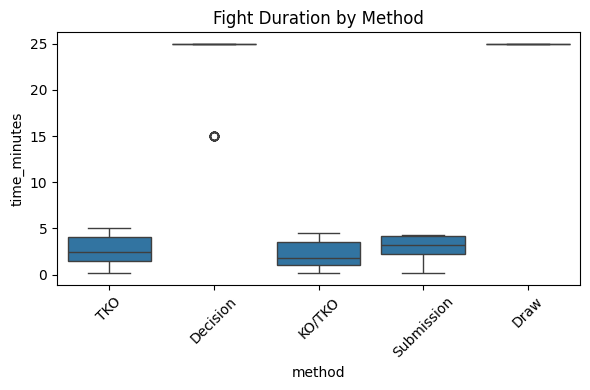

In [23]:
if {"method","time_minutes"}.issubset(df.columns):
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x="method", y="time_minutes")
    plt.title("Fight Duration by Method")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(os.path.join(outdir, "box_time_by_method.png"))
    plt.show()


In [21]:
print("\n✅ EDA complete. All reports saved in:", outdir)


✅ EDA complete. All reports saved in: C:\Users\khuza\OneDrive\Desktop\Data science course\PROJECTS\UFC Fighter Performance Analytics Dashboard\reports\figures
